In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
# Load the dataset
file_path = "C:/Users/BrindhaGanesan/Downloads/IECBC-Evaluation-Report-20250101070020135.csv"
df_eval_report = pd.read_csv(file_path)

# Display first few rows to check the structure
df_eval_report.head(2)


,Username,Course Name,Eval Question,Eval Response,Eval Rating,Eval Response DateAdded,Cohort Name,Program Version,Gender,Age,...,Statut au Canada,Situation maritale,Pays de naissance,Pays d_où vous avez immigré_immigrerez,Année d_arrivée au Canada _saisir 0 si non applicable_,Plus haut niveau de formation,Quelle est votre situation professionnelle actuelle,Dans quelle industrie ou secteur travaillez_vous,Est_ce votre secteur ou industrie de prédilection,Quel est votre salaire annuel actuel
0,000458131@student.vcc.ca,Module 1: The value of your existing skills an...,3. What was your favourite part of Module 1?,CliftonStrengths was one of my favourite.,0,2024-11-04 7:07,"VCC Oct - Dec, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,000458131@student.vcc.ca,Module 1: The value of your existing skills an...,1. What is your overall rating for Module 1?,NaN,4,2024-11-04 7:07,"VCC Oct - Dec, 2024",Online,Female,50-59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_eval_report.shape

(8000, 38)

In [7]:
df_eval_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 38 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Username                                                8000 non-null   object 
 1   Course Name                                             8000 non-null   object 
 2   Eval Question                                           8000 non-null   object 
 3   Eval Response                                           2266 non-null   object 
 4   Eval Rating                                             8000 non-null   int64  
 5   Eval Response DateAdded                                 8000 non-null   object 
 6   Cohort Name                                             8000 non-null   object 
 7   Program Version                                         8000 non-null   object 
 8   Gender                                

In [9]:
# Remove leading/trailing spaces in 'Eval Question'
df_eval_report["Eval Question"] = df_eval_report["Eval Question"].str.strip()


In [11]:
## Define the Correct "overall rating?" Questions

# Define overall_ratings questions with exact formatting
overall_ratings = [
    "1. What is your overall rating for Module 1?",
    "1. What is your overall rating for Module 2?",
    "1. What is your overall rating for Module 3?",
    "1. What is your overall rating for Module 4?",
    "1. What is your overall rating for Module 5?",
    "1. What is your overall rating for Module 6?",
    "1. What is your overall rating for Module 7?"
]

In [13]:
#  Filter for Relevant Questions and Responses
df_overall_ratings = df_eval_report[df_eval_report["Eval Question"].isin(overall_ratings)][["Eval Question", "Eval Rating"]]
df_overall_ratings

,Eval Question,Eval Rating
1,1. What is your overall rating for Module 1?,4
8,1. What is your overall rating for Module 2?,4
10,1. What is your overall rating for Module 3?,4
17,1. What is your overall rating for Module 4?,4
22,1. What is your overall rating for Module 5?,4
...,...,...
7977,1. What is your overall rating for Module 2?,5
7982,1. What is your overall rating for Module 3?,0
7989,1. What is your overall rating for Module 4?,0
7993,1. What is your overall rating for Module 5?,0


In [15]:
df_overall_ratings.shape

(1319, 2)

In [17]:
# Extracting module names from Eval Question
df_overall_ratings["Module"] = df_overall_ratings["Eval Question"].str.extract(r"(Module \d+)")
df_overall_ratings["Module"]

1       Module 1
8       Module 2
10      Module 3
17      Module 4
22      Module 5
          ...   
7977    Module 2
7982    Module 3
7989    Module 4
7993    Module 5
7998    Module 6
Name: Module, Length: 1319, dtype: object

In [19]:
# Getting unique module names
modules = df_overall_ratings["Module"].unique()
modules

array(['Module 1', 'Module 2', 'Module 3', 'Module 4', 'Module 5',
       'Module 6'], dtype=object)

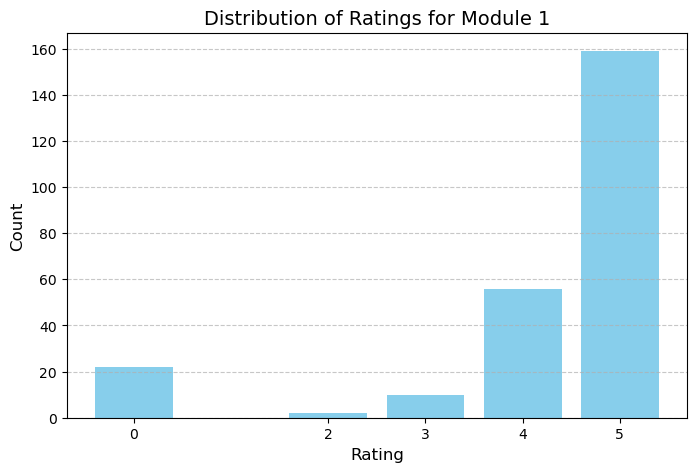

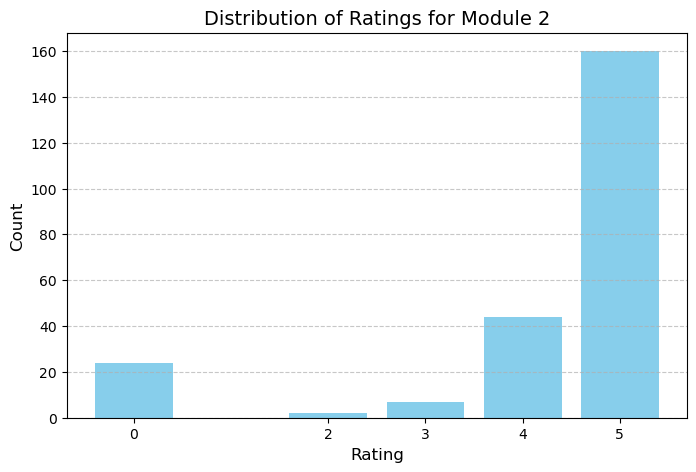

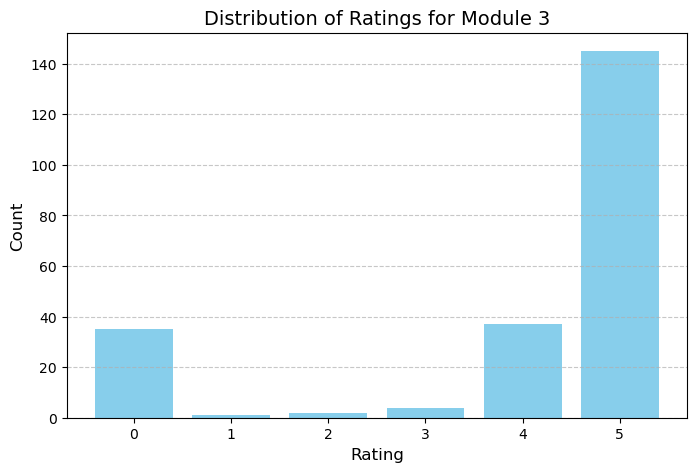

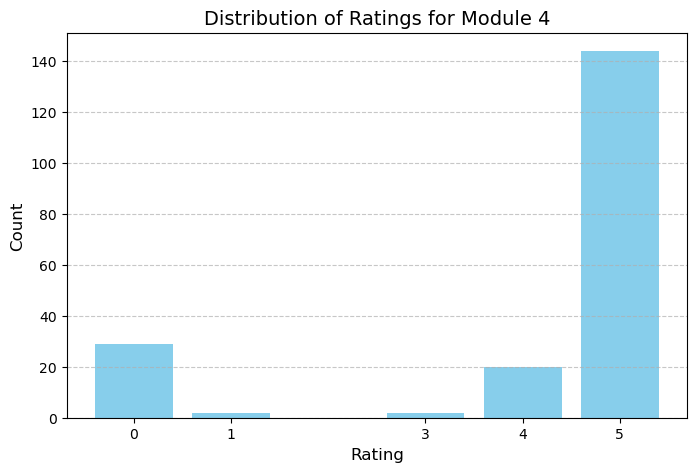

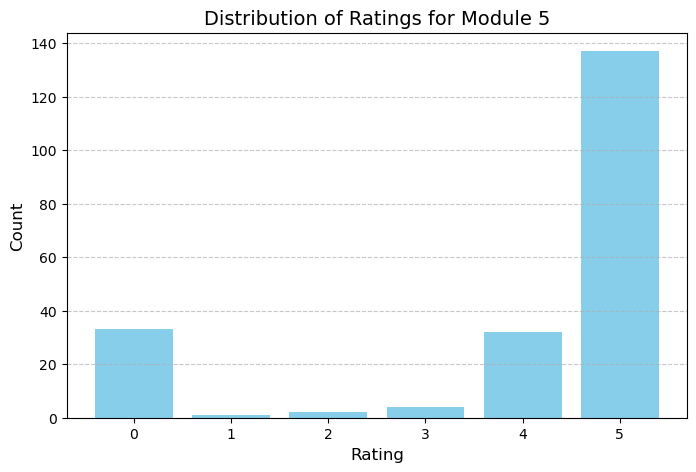

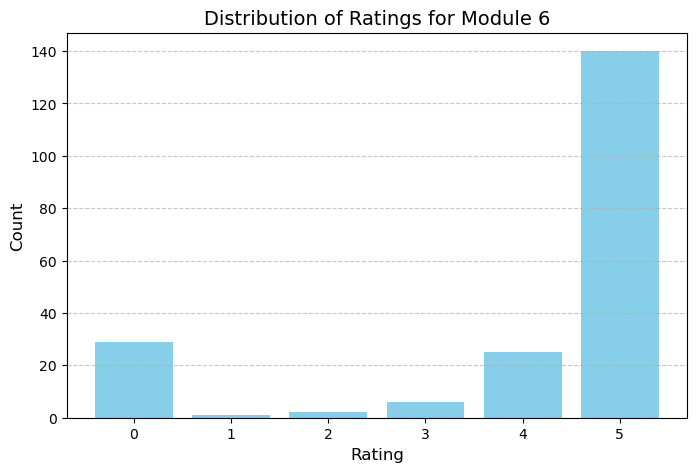

In [21]:
# Creating a separate bar chart for each module
for module in modules:
    # Filter data for the module
    df_module = df_overall_ratings[df_overall_ratings["Module"] == module]
    
    # Aggregate data: Count occurrences of each rating
    df_module_sorted = df_module.groupby("Eval Rating").size().reset_index(name="Count")
    
    # Sorting by rating
    df_module_sorted = df_module_sorted.sort_values("Eval Rating")

    # Plotting
    plt.figure(figsize=(8, 5))
    plt.bar(df_module_sorted["Eval Rating"], df_module_sorted["Count"], color="skyblue")
    plt.xlabel("Rating", fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.title(f"Distribution of Ratings for {module}", fontsize=14)
    plt.xticks(df_module_sorted["Eval Rating"])
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # Show the chart
    plt.show()